In [1]:
%matplotlib inline

import os,sys
sys.path.append('/home/dpirvu/axion/hmvec-master/')
sys.path.append('/home/dpirvu/')
import hmvec as hm

In [2]:
%run '/home/dpirvu/DarkPhoton/hmvec-master/compute_power_spectra.py'
%run '/home/dpirvu/DarkPhoton/hmvec-master/params.py'
%run '/home/dpirvu/DarkPhoton/hmvec-master/plotting.py'

In [3]:

np_load_old = np.load
np.load     = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


In [4]:
from scipy.interpolate import interp2d,interp1d
import scipy.interpolate as si


In [5]:
ellMax = 9800
ells = np.arange(ellMax)

getgas = True
dictKey = dictKey_gas
model = modelParams_gas
rscale = False

cych = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

baseline = ghztoev(30)

ztype = [6.]
zreio = 6.
nZs = 50
nMs = 100

fsky = [0.7, 0.5, 0.5]

# dark photon params
zind = 0
mind = 20


In [6]:
probelldata  = np.zeros((len(ztype), len(dictKey), ellMax, nZs, nMs))

for mii, MA in enumerate(dictKey):
    if mii!=mind: continue
    for zii, ztest in enumerate(ztype):
        if zii!=zind: continue

        zMin, zMax, rMin, rMax = chooseModel(MA, model)
        zMax = min(ztest, zMax)

        data = import_data_short(MA, nZs, zMin, zMax, ellMax, getgas, rscale)
        rcrossMW, probMW, rcross, prob, avtau, dtaudz, uell0, Cell1H, Cell2H, CMBDP = data

        probelldata[zii,mii] = prob[None,...] * uell0


In [7]:
hlil = 0.674

In [8]:
np.log10(6.251e11)

11.795949498902804

In [9]:
np.log10(6.251e11/hlil)

11.967934434678826

In [10]:
if True:
    zMin = 0.005
    zMax = 4.

    mMin = 7e8/hlil
    mMax = 3.5e15/hlil
    ms  = np.geomspace(mMin,mMax,nMs)       # masses
    zs  = np.linspace(zMin,zMax,nZs)        # redshifts
    ks  = np.geomspace(1e-4,1e3,1001)       # wavenumbers

    # Halo Model
    hcos1 = hm.HaloModel(zs, ks, ms=ms, mass_function='tinker', mdef='vir', concmode='duffy')
    hcos = hm.HaloModel(zs, ks, ms=ms, mass_function='tinker', mdef='vir', concmode='BHATTACHARYA')
    #gas = hcos.add_battaglia_profile("y", family="AGN", xmax=2, nxs=30000)

    hod_name = "unWISE blue"
    hcos.add_hod(name=hod_name)

    chis     = hcos.comoving_radial_distance(zs)
    rvirs    = hcos.rvir(ms[None,:],zs[:,None])
    cs       = hcos.concentration()
    Hz       = hcos.h_of_z(zs)
    nzm      = hcos.get_nzm()
    biases   = hcos.get_bh()
    deltav   = hcos.deltav(zs)
    rhocritz = hcos.rho_critical_z(zs)
    dvols    = get_volume_conv(chis, Hz)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005
0.9833673469387756
1.961734693877551
0.9018367346938776
1.880204081632653


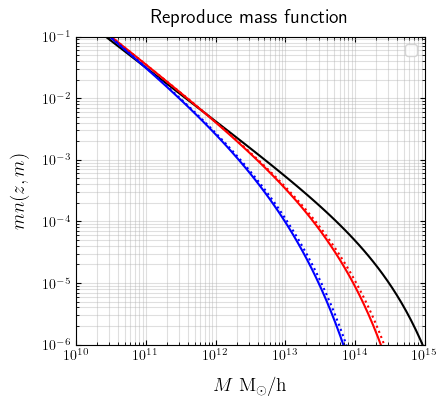

In [11]:
a0 = np.argmin(np.abs(zs-0.)); print(zs[a0])
a1 = np.argmin(np.abs(zs-1.)); print(zs[a1])
a2 = np.argmin(np.abs(zs-2.)); print(zs[a2])

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))

plt.plot(ms*hlil, ms*nzm[a0,:]/hlil**3., color='k', ls='-')
plt.plot(ms*hlil, ms*nzm[a1,:]/hlil**3., color='r', ls='-')
plt.plot(ms*hlil, ms*nzm[a2,:]/hlil**3., color='b', ls='-')

a1 = np.argmin(np.abs(zs-1.))-1; print(zs[a1])
a2 = np.argmin(np.abs(zs-2.))-1; print(zs[a2])

plt.plot(ms*hlil, ms*nzm[a1,:]/hlil**3., color='r', ls=':')
plt.plot(ms*hlil, ms*nzm[a2,:]/hlil**3., color='b', ls=':')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e10, 1e15)
plt.ylim(1e-6, 1e-1)

plt.legend()
ax.set_xlabel(r'$M {\rm \; M_\odot/h}$')
ax.set_ylabel(r'$m n(z,m)$')
ax.set_title('Reproduce mass function')
ax.yaxis.set_ticks_position('both'); ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', axis="y", direction="in"); ax.tick_params(which='both', axis="x", direction="in")
plt.grid(which='both', alpha=0.4)
plt.show()

2.0 6.0


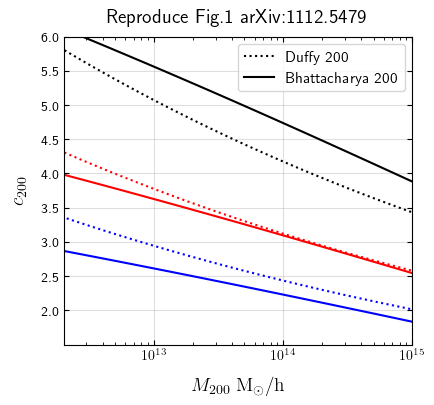

In [15]:
ms200_duffy, rs200_duffy, cs200_duffy = hcos1.mrc200()
ms200, rs200, cs200 = hcos.mrc200()

a0 = np.argmin(np.abs(zs-0.))
a1 = np.argmin(np.abs(zs-1.))
a2 = np.argmin(np.abs(zs-2.))

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))

plt.plot(ms200_duffy[a0,:]*hlil, cs200_duffy[a0,:], color='k', ls=':', label='Duffy 200')
plt.plot(ms200[a0,:]*hlil, cs200[a0,:], color='k', ls='-', label='Bhattacharya 200')

plt.plot(ms200_duffy[a1,:]*hlil, cs200_duffy[a1,:], color='r', ls=':')
plt.plot(ms200[a1,:]*hlil, cs200[a1,:], color='r', ls='-')

plt.plot(ms200_duffy[a2,:]*hlil, cs200_duffy[a2,:], color='b', ls=':')
plt.plot(ms200[a2,:]*hlil, cs200[a2,:], color='b', ls='-')

plt.xscale('log')
plt.xlim(2.e12, 1e15)
plt.ylim(1.5, 6)

a = ax.get_yticks().tolist(); print(a[1], a[-1])
a = np.linspace(a[1], a[-1], 9)
a = [round(aa,1) for aa in a]
ax.set_yticks(a)
ax.set_yticklabels(a)

plt.legend()
ax.set_xlabel(r'$M_{\rm 200} {\rm \; M_\odot/h}$'); ax.set_ylabel(r'$c_{\rm 200}$')
ax.set_title('Reproduce Fig.1 arXiv:1112.5479')
ax.yaxis.set_ticks_position('both'); ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', axis="y", direction="in"); ax.tick_params(which='both', axis="x", direction="in")
plt.grid(alpha=0.4)
plt.show()

In [16]:
dndz_data = np.transpose(np.loadtxt("./hmvec-master/data/blue.txt", dtype=float))
dndz = np.interp(zs, dndz_data[0,:], dndz_data[1,:])
N_gtot = np.trapz(dndz, zs, axis=0)
W_g = dndz/N_gtot
dndz_data[1,:] = dndz_data[1,:]/N_gtot

print(np.trapz(W_g, zs))

1.0


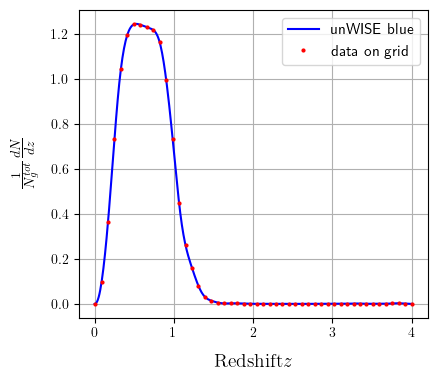

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
plt.plot(dndz_data[0,:], dndz_data[1,:], color='b', label='unWISE blue')
plt.plot(zs, W_g, color='r', marker='o', ls='None', ms=2, label='data on grid')

#a = [round(xi, 1) for xi in np.linspace(0, 1.2, 5)]
#ax.set_yticks(a)
#a = [al for aind, al in enumerate(a)]
#ax.set_yticklabels(a)

plt.ylabel(r'$\frac{1}{N^{tot}_g} \frac{d N}{d z}$')
plt.xlabel(r'${\rm Redshift} z$')
plt.grid()
plt.legend()
plt.show()

In [18]:
Ncs = hcos.hods[hod_name]['Nc']
Nss = hcos.hods[hod_name]['Ns']
ngal = hcos.hods[hod_name]['ngal']
bgal = hcos.hods[hod_name]['bg']
satellite_profile_name = hcos.hods[hod_name]['satellite_profile']
print(satellite_profile_name)
central_profile_name = hcos.hods[hod_name]['central_profile']
print(central_profile_name)


nfw
None


In [19]:
ngtest = np.trapz(nzm * (Ncs + Nss), ms, axis=1)

barsn = np.trapz(ngtest * dvols * W_g, zs)/(4.*np.pi)
ASN = -0.255/1e7
Cell_sn = np.ones(len(ells)) * ASN

print(1./barsn, ASN, 1./barsn + ASN)

hubvol = 10e9 #in Mpc
print((4.*np.pi)/(1./barsn + ASN))


1.441246006338705e-07 -2.55e-08 1.186246006338705e-07
105933934.0002898


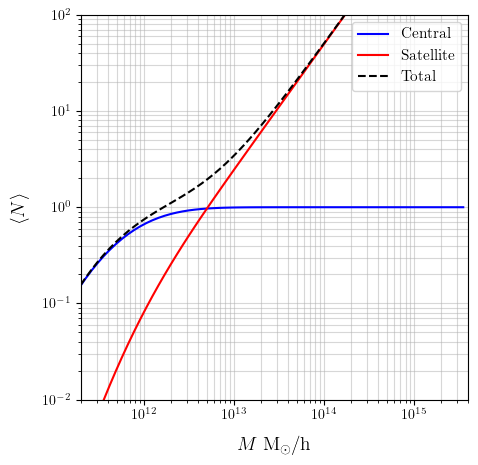

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(ms*hlil, Ncs, ls='-', color='b', label=r'$\rm Central$')
plt.plot(ms*hlil, Nss, ls='-', color='r', label=r'$\rm Satellite$')
plt.plot(ms*hlil, (Ncs+Nss), ls='--', color='k', label=r'$\rm Total$')

plt.ylim(1e-2, 1e2)
plt.xlim(2e11, 4e15)
plt.xlabel(r'$M {\rm \; M_\odot/h}$')
plt.ylabel(r'$\left< N \right>$')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()
plt.show()

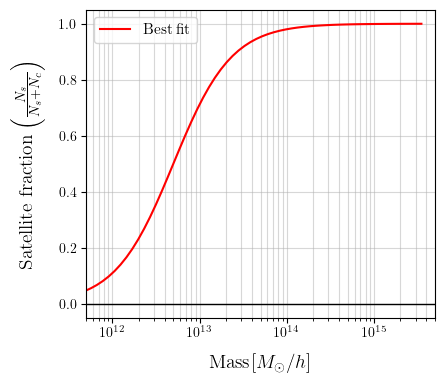

In [21]:
# Reproduce Fig. 10 satellite fraction per halo
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
plt.plot(ms*hlil, (Nss/(Ncs+Nss)), ls='-', color='r', label=r'$\rm Best \; fit$')

plt.ylim(-0.05, 1.05)
plt.xlim(5e11, 5e15)
plt.ylabel(r'${\rm Satellite \; fraction} \left( \frac{N_s}{N_s + N_c} \right)$')
plt.xlabel(r'${\rm Mass} [M_\odot/h]$')
plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.legend()
plt.show()

In [22]:
# uc = 1 means central galaxies sit at the centres of halos; no spatial distrib
# us = NFW(k) satellites follow NFW profile; this one is projected into Fourier modes

hod, uc, us = hcos._get_hod_common(hod_name)
print(uc)
print(np.shape(us))

1.0
(50, 100, 1001)


0.9833673469387756 1
4.559993659413999 4.457652303120356
1927.7651474631232 1956.9093610698365
2.828203793774899


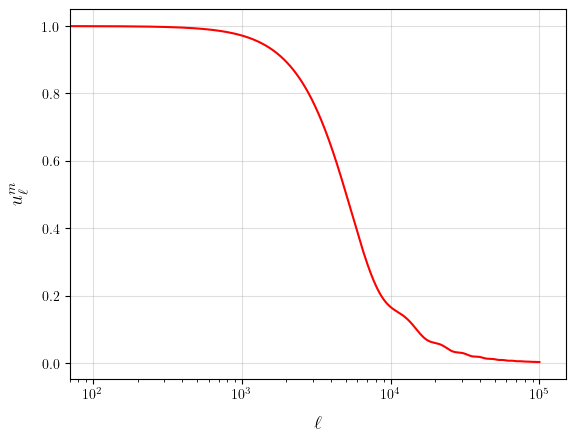

In [23]:
# Reproduce Fig. 15: projection of NFW

# get indices of z,m,chi that corresp to params in image description
aid = np.argmin(np.abs(zs-1)); print(zs[aid], 1)
mid = np.argmin(np.abs(ms200[aid,:]*hlil-3e14)); print(ms200[aid, mid]/1e14, 3e14/hlil/1e14)
cid = np.argmin(np.abs(chis*hlil-1317)); print(chis[cid], 1317/hlil)

# check that the concentration matches description
print(cs200[aid,mid])

ellkks = np.arange(1e5)
usell = np.zeros((len(zs), len(ellkks)))
f = interp2d(ks, zs, us[:,mid], bounds_error=True)     
for ii, ell in enumerate(ellkks):
    kevals = (ell+0.5)/chis
    interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
    usell[:, ii] = interpolated

plt.plot(ellkks, usell[aid,:], 'r')

plt.grid(alpha=0.4)
plt.xlim((70,1.5e5))
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$u_\ell^m$')
plt.savefig("./plots/uell.pdf")
plt.show()

0
Best fit mean galaxy bias: 1.5063893210066484 cf. paper value b_g = 1.49


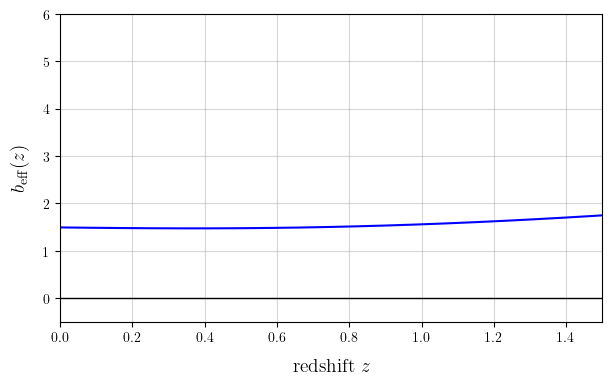

In [24]:
# Reproduce Fig. 11 galaxy bias
beff = 1./ngal * np.trapz(nzm * biases * (Ncs + Nss)[None,:], ms, axis=1)
bg = np.trapz(W_g*beff, zs, axis=0)

print(np.count_nonzero((np.round(bgal,10)-np.round(beff,10)).flatten()))
print('Best fit mean galaxy bias:', bg, 'cf. paper value b_g = 1.49')

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
plt.plot(zs, beff, 'b')
plt.ylabel(r'$b_{\rm eff}(z)$')
plt.xlabel(r'${\rm redshift \;} z$')
plt.xlim((0, 1.5))
plt.ylim((-0.5, 6))
plt.grid(alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.show()

Best fit halo mass: $22520284824903.8$ cf. paper value Mh =  $27934621099554.2$ Msolar


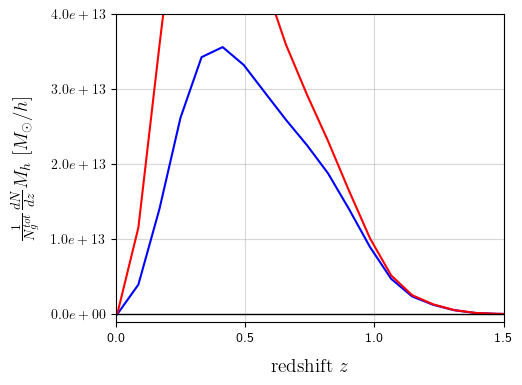

In [25]:
# Reproduce Fig. 12 mean host halo mass
# This one's off by a factor of 4??

massh = W_g/ngal * np.trapz(nzm[:,:-16] * (Ncs + Nss)[None,:-16] * ms[None,:-16], ms[:-16], axis=1)
avmh = np.trapz(massh, zs, axis=0)
massh2 = W_g/ngal * np.trapz(nzm * (Ncs + Nss)[None,:] * ms[None,:], ms[:], axis=1)
avmh = np.trapz(massh, zs, axis=0)

print('Best fit halo mass:', r'${:.1f}$'.format(avmh), 'cf. paper value Mh = ', r'${:.1f}$'.format(1.88e13/hlil), 'Msolar')

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plt.plot(zs, massh, 'b')
plt.plot(zs, massh2, 'r')
plt.ylabel(r'$\frac{1}{N^{tot}_g} \frac{d N}{d z} M_h {\; [M_\odot/h]}$')
plt.xlabel(r'${\rm redshift \;} z$')

#plt.yscale('log')

a = [round(xi, 1) for xi in np.linspace(0, 1.5, 4)]
ax.set_xticks(a)
a = [al for aind, al in enumerate(a)]
ax.set_xticklabels(a)

plt.ylim((-1e12, 3.9e13))

a = ax.get_yticks()[1::2]
ax.set_yticks(a)
a = [r'${:.1e}$'.format(al) for aind, al in enumerate(a)]
ax.set_yticklabels(a)

plt.xlim((0, 1.5))
plt.grid(alpha=0.5)
plt.axhline(0, color='k', linewidth=1)
plt.show()

In [26]:
# Reproduce alpha sat
alphsat = np.trapz(W_g/ngal * np.trapz(nzm * Nss[None,:], ms, axis=1), zs, axis=0)

print('Best fit halo mass:', alphsat, 'cf. best fit paper value a_sat = 0.30')

Best fit halo mass: 0.32468524458790315 cf. best fit paper value a_sat = 0.30


In [27]:
# HOD

uk_g = (Ncs[None,:,None] + us * Nss[None,:,None]) / ngal[:,None,None]
uk_gsq = (2. * us * Nss[None,:,None] + us**2. * Nss[None,:,None]**2.) / ngal[:,None,None]**2.


#### Interpolate NFW profiles uk, uksq and lin mat. pow. Pzk onto ells: ks = (ell+0.5)/chis


In [28]:
uell_profile, uellsq_profile = np.zeros((2, len(zs), len(ms), len(ells)))
Pzell = np.zeros((len(zs), len(ells)))

f = interp2d(ks, zs, hcos.Pzk, bounds_error=True)     
for ii, ell in enumerate(ells):
    kevals = (ell+0.5)/chis
    interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
    Pzell[:, ii] = interpolated

for mi, mm in enumerate(ms):
    f = interp2d(ks, zs, uk_g[:,mi,:], bounds_error=True)     
    for ii, ell in enumerate(ells):
        kevals = (ell+0.5)/chis
        interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
        uell_profile[:, mi, ii] = interpolated

    f = interp2d(ks, zs, uk_gsq[:,mi,:], bounds_error=True)     
    for ii, ell in enumerate(ells):
        kevals = (ell+0.5)/chis
        interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
        uellsq_profile[:, mi, ii] = interpolated


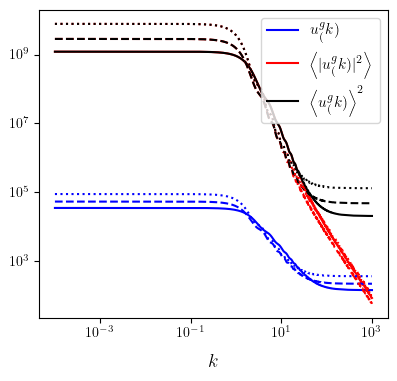

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
plt.plot(ks, uk_g[a0,mid,:], ls='-', color='b', label=r'$u^g_(k)$')
plt.plot(ks, uk_gsq[a0,mid,:], ls='-', color='r', label=r'$\left< |u^g_(k)|^2 \right>$')
plt.plot(ks, uk_g[a0,mid,:]**2, ls='-', color='k', label=r'$\left< u^g_(k) \right>^2$')

plt.plot(ks, uk_g[a1,mid,:], ls='--', color='b')
plt.plot(ks, uk_gsq[a1,mid,:], ls='--', color='r')
plt.plot(ks, uk_g[a1,mid,:]**2, ls='--', color='k')

plt.plot(ks, uk_g[a2,mid,:], ls=':', color='b')
plt.plot(ks, uk_gsq[a2,mid,:], ls=':', color='r')
plt.plot(ks, uk_g[a2,mid,:]**2, ls=':', color='k')

plt.xlabel(r'$k$')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

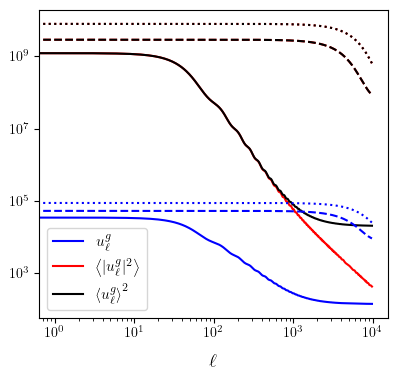

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
plt.plot(ells, uell_profile[a0,mid,:], ls='-', color='b', label=r'$u^g_\ell$')
plt.plot(ells, uellsq_profile[a0,mid,:], ls='-', color='r', label=r'$\left< |u^g_\ell|^2 \right>$')
plt.plot(ells, uell_profile[a0,mid,:]**2, ls='-', color='k', label=r'$\left< u^g_\ell \right>^2$')

plt.plot(ells, uell_profile[a1,mid,:], ls='--', color='b')
plt.plot(ells, uellsq_profile[a1,mid,:], ls='--', color='r')
plt.plot(ells, uell_profile[a1,mid,:]**2, ls='--', color='k')

plt.plot(ells, uell_profile[a2,mid,:], ls=':', color='b')
plt.plot(ells, uellsq_profile[a2,mid,:], ls=':', color='r')
plt.plot(ells, uell_profile[a2,mid,:]**2, ls=':', color='k')

plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

In [31]:
# Construct power spectra

Cell_1h = (W_g[:,None]/dvols[:,None])**2. * np.trapz(nzm[...,None] * uellsq_profile, ms, axis=1)
Cell_1h = np.trapz(dvols[:,None] * Cell_1h, zs, axis=0)

intzell = W_g[:,None]/dvols[:,None] * np.trapz(nzm[...,None] * biases[...,None] * uell_profile, ms, axis=1)
Cell_2h = np.trapz(dvols[:,None] * np.abs(intzell)**2. * Pzell, zs, axis=0)

Cell_tot = Cell_1h + Cell_2h


#### Next: check if this is equivalent to computing power spectra Pk then doing a Limber integral (like in hmvec)

In [32]:
# Power spectra

Pk_gg_1h = W_g[:,None]**2. * np.trapz(nzm[...,None] * uk_gsq, ms, axis=1)

intzell  = np.trapz(nzm[...,None] * biases[...,None] * uk_g, ms, axis=1)
Pk_gg_2h = W_g[:,None]**2. * np.abs(intzell)**2. * hcos.Pzk

Pk_gg = Pk_gg_1h + Pk_gg_2h

In [33]:
k1_a = np.geomspace(1e-3,10.,5000)
k2_a = np.geomspace(1e-3,10.,5000)


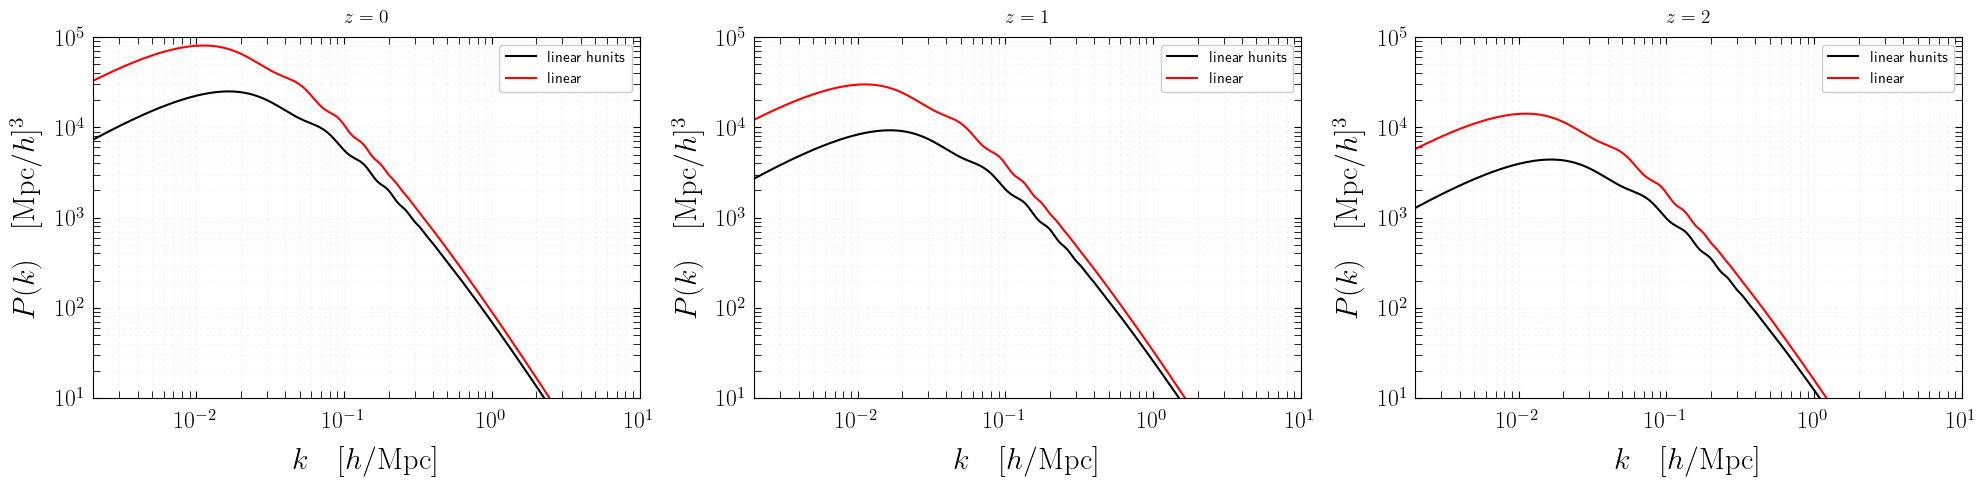

In [34]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = np.array([0.])
Pzk2 = hcos._get_matter_power_hunits(z,k2_a,nonlinear=False)
ax.plot(k2_a, Pzk2[0,:], label=r'linear hunits',alpha=1.,c='k')
Pzk1 = hcos._get_matter_power(z,k1_a,nonlinear=False)
ax.plot(k1_a, Pzk1[0,:], label=r'linear',alpha=1.,c='r')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = np.array([1.])
Pzk2 = hcos._get_matter_power_hunits(z,k2_a,nonlinear=False)
ax.plot(k2_a, Pzk2[0,:], label=r'linear hunits',alpha=1.,c='k')
Pzk1 = hcos._get_matter_power(z,k1_a,nonlinear=False)
ax.plot(k1_a, Pzk1[0,:], label=r'linear',alpha=1.,c='r')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

z = np.array([2.])
Pzk2 = hcos._get_matter_power_hunits(z,k2_a,nonlinear=False)
ax.plot(k2_a, Pzk2[0,:], label=r'linear hunits',alpha=1.,c='k')
Pzk1 = hcos._get_matter_power(z,k1_a,nonlinear=False)
ax.plot(k1_a, Pzk1[0,:], label=r'linear',alpha=1.,c='r')
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$z=2$')

fig.tight_layout()
#plt.savefig('figures/pkz.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


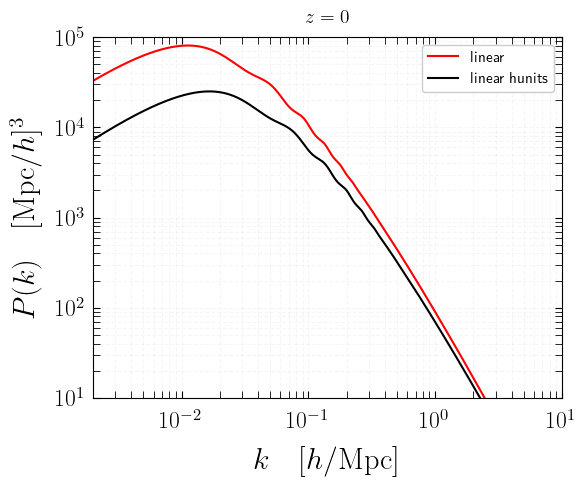

In [35]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=0$')
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

z = np.array([0.])

Pzk1 = hcos._get_matter_power(z,k1_a,nonlinear=False)
ax.plot(k1_a, Pzk1[0,:], label=r'linear',alpha=1.,c='r')

Pzk2 = hcos._get_matter_power_hunits(z,k2_a,nonlinear=False)
ax.plot(k2_a, Pzk2[0,:], label=r'linear hunits',alpha=1.,c='k')

ax.loglog()

ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)
ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)
fig.tight_layout()
#plt.savefig('figures/pkz.pdf')

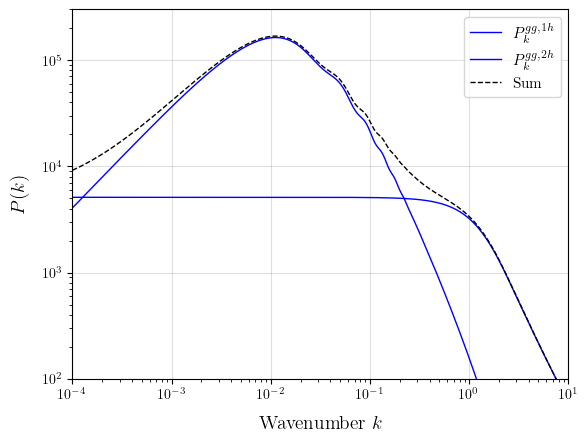

In [36]:
plt.plot(ks, Pk_gg_1h[cid], ls='-', color='b', linewidth=1, label=r'$P_k^{gg,1h}$')
plt.plot(ks, Pk_gg_2h[cid], ls='-', color='b', linewidth=1, label=r'$P_k^{gg,2h}$')
plt.plot(ks, Pk_gg[cid], ls='--', color='k', linewidth=1, label=r'$\rm Sum$')

plt.xlabel(r'${\rm Wavenumber \;} k$')
plt.ylabel(r'$P(k)$')
plt.ylim(1e2, 3e5)
plt.xlim(min(ks), 1e1)
plt.xscale('log')
plt.yscale('log')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

In [37]:
def limber_int(ells,zs,ks,Pzks,hzs,chis):
    hzs = np.array(hzs).reshape(-1)
    chis = np.array(chis).reshape(-1)
    prefactor = hzs / chis**2.

    f = interp2d(ks, zs, Pzks, bounds_error=True)     

    Cells = np.zeros(ells.shape)
    for ii, ell in enumerate(ells):
        kevals = (ell+0.5)/chis
        interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
        Cells[ii] = np.trapz(interpolated*prefactor, zs)
    return Cells


In [38]:
Cls_gg_1h = limber_int(ells, zs, ks, Pk_gg_1h, Hz, chis)
Cls_gg_2h = limber_int(ells, zs, ks, Pk_gg_2h, Hz, chis)
Cls_gg = limber_int(ells, zs, ks, Pk_gg, Hz, chis)


#### Reproduce Fig. 8 and check that the two metdhos are equivalent


In [39]:
Pzell_hunits = np.zeros((len(zs), len(ells)))

Pzk_hunits = hcos._get_matter_power_hunits(zs,ks,nonlinear=False)
f = interp2d(ks, zs, Pzk_hunits, bounds_error=True)     
for ii, ell in enumerate(ells):
    kevals = (ell+0.5)/chis
    interpolated = si.dfitpack.bispeu(f.tck[0], f.tck[1], f.tck[2], f.tck[3], f.tck[4], kevals, zs)[0]
    Pzell_hunits[:, ii] = interpolated


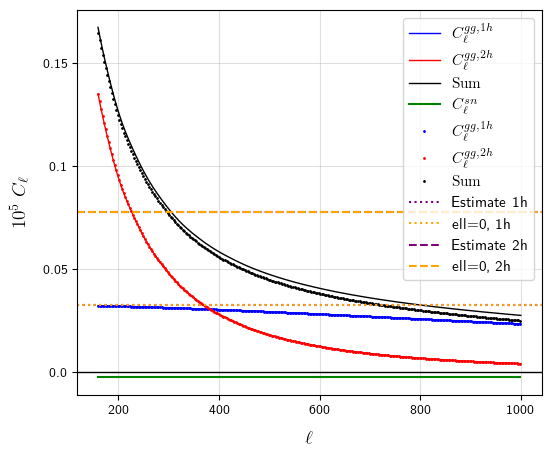

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ellr = np.arange(160, 1000)
fact = 1.e5
plt.plot(ells[ellr], fact*Cls_gg_1h[ellr], ls='-', lw=1, color='b', label=r'$C_\ell^{gg,1h}$')
plt.plot(ells[ellr], fact*Cls_gg_2h[ellr], ls='-', lw=1, color='r', label=r'$C_\ell^{gg,2h}$')
plt.plot(ells[ellr], fact*Cls_gg[ellr], ls='-', lw=1, color='k', label=r'$\rm Sum$')

plt.plot(ells[ellr[::3]], fact*Cell_1h[ellr[::3]], 'o', ms=1, color='b', label=r'$C_\ell^{gg,1h}$')
plt.plot(ells[ellr[::3]], fact*Cell_2h[ellr[::3]], 'o', ms=1, color='r', label=r'$C_\ell^{gg,2h}$')
plt.plot(ells[ellr[::3]], fact*Cell_tot[ellr[::3]], 'o', ms=1, color='k', label=r'$\rm Sum$')

# Construct power spectra
test1h = (W_g/dvols)**2. * np.trapz(nzm * uellsq_profile[:,:,0], ms, axis=1)
test1h = np.trapz(dvols * test1h, zs, axis=0)
test2h = W_g/dvols * beff
test2h = np.trapz(dvols * np.abs(test2h)**2. * Pzell[:,0], zs, axis=0)
test2hh = np.trapz(dvols * np.abs(test2h)**2. * Pzell_hunits[:,0], zs, axis=0)

plt.axhline(test1h*fact, ls=':', color='purple', label='Estimate 1h')
plt.axhline(fact*Cell_1h[0], ls=':', color='orange', label='ell=0, 1h')
plt.axhline(test2h*fact, ls='--', color='purple', label='Estimate 2h')
#plt.axhline(test2hh*fact, ls='--', color='purple', label='Estimate hunits 2h')
plt.axhline(fact*Cell_2h[0], ls='--', color='orange', label='ell=0, 2h')

a = np.array(np.linspace(200, 1000, 5), dtype='int')
ax.set_xticks(a)
a = [al for aind, al in enumerate(a)]
ax.set_xticklabels(a)

a = [round(xi, 2) for xi in np.linspace(0, 0.15, 4)]
ax.set_yticks(a)
a = [al for aind, al in enumerate(a)]
ax.set_yticklabels(a)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^5 \; C_\ell$')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


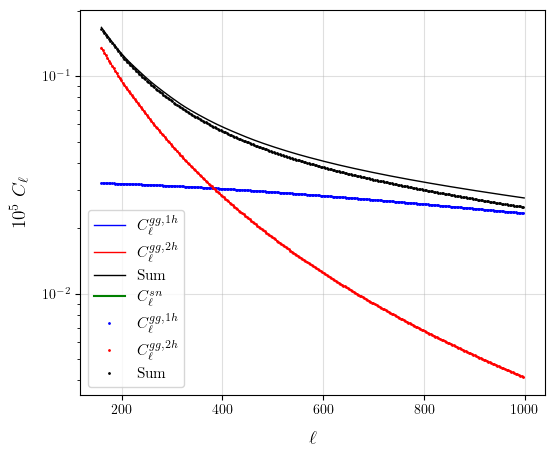

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ellr = np.arange(160, 1000)
fact = 1.e5
plt.plot(ells[ellr], fact*Cls_gg_1h[ellr], ls='-', lw=1, color='b', label=r'$C_\ell^{gg,1h}$')
plt.plot(ells[ellr], fact*Cls_gg_2h[ellr], ls='-', lw=1, color='r', label=r'$C_\ell^{gg,2h}$')
plt.plot(ells[ellr], fact*Cls_gg[ellr], ls='-', lw=1, color='k', label=r'$\rm Sum$')

plt.plot(ells[ellr[::3]], fact*Cell_1h[ellr[::3]], 'o', ms=1, color='b', label=r'$C_\ell^{gg,1h}$')
plt.plot(ells[ellr[::3]], fact*Cell_2h[ellr[::3]], 'o', ms=1, color='r', label=r'$C_\ell^{gg,2h}$')
plt.plot(ells[ellr[::3]], fact*Cell_tot[ellr[::3]], 'o', ms=1, color='k', label=r'$\rm Sum$')

plt.yscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$10^5 \; C_\ell$')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


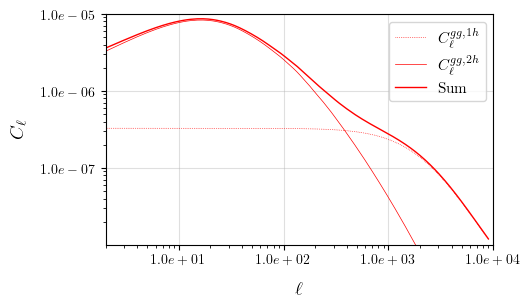

In [52]:
""" Reproduce Fig. 14. """

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ellr = np.arange(2, 9000)
fact = 1.#(ells * (ells+1.)/2./np.pi)[ellr]
plt.plot(ells[ellr], fact*Cls_gg_1h[ellr], ls=':', lw=0.5, color='r', label=r'$C_\ell^{gg,1h}$')
plt.plot(ells[ellr], fact*Cls_gg_2h[ellr], ls='-', lw=0.5, color='r', label=r'$C_\ell^{gg,2h}$')
plt.plot(ells[ellr], fact*Cls_gg[ellr], ls='-', lw=1, color='r', label=r'$\rm Sum$')

plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-8, 1e-5))
plt.xlim((2, 1e4))

a = np.array(np.geomspace(1e-7, 1e-5, 3))
ax.set_yticks(a)
a = [r'${:.1e}$'.format(al) for aind, al in enumerate(a)]
ax.set_yticklabels(a)

a = np.array(np.geomspace(10, 1e4, 4), dtype='int')
ax.set_xticks(a)
a = [r'${:.1e}$'.format(al) for aind, al in enumerate(a)]
ax.set_xticklabels(a)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

In [42]:
# Construct power spectra

zell_tau = (np.sqrt((4.*np.pi)/(2*ells+1))[:,None,None] * probelldata[zind,mind]).transpose(1,2,0)
zell_g   = (W_g/dvols)[:,None,None] * uell_profile

int_zell_taug = np.trapz(nzm[...,None] * zell_tau * zell_g, ms, axis=1)

int_zell_tau  = np.trapz(nzm[...,None] * biases[...,None] * zell_tau, ms, axis=1)
int_zell_g    = np.trapz(nzm[...,None] * biases[...,None] * zell_g,   ms, axis=1)

Cell_taug_1h = np.trapz(dvols[:,None] * int_zell_taug, zs, axis=0)
Cell_taug_2h = np.trapz(dvols[:,None] * Pzell * int_zell_tau * int_zell_g, zs, axis=0)

Cell_taug_tot = (Cell_taug_1h + Cell_taug_2h)


In [43]:
varep = 2e-3
dpfact = varep**2. / baseline


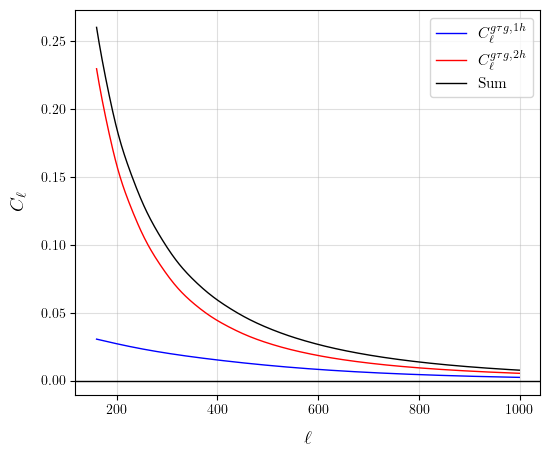

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ellr = np.arange(160, 1000)
plt.plot(ells[ellr], dpfact * Cell_taug_1h[ellr], ls='-', lw=1, color='b', label=r'$C_\ell^{g\tau g,1h}$')
plt.plot(ells[ellr], dpfact * Cell_taug_2h[ellr], ls='-', lw=1, color='r', label=r'$C_\ell^{g\tau g,2h}$')
plt.plot(ells[ellr], dpfact * Cell_taug_tot[ellr], ls='-', lw=1, color='k', label=r'$\rm Sum$')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


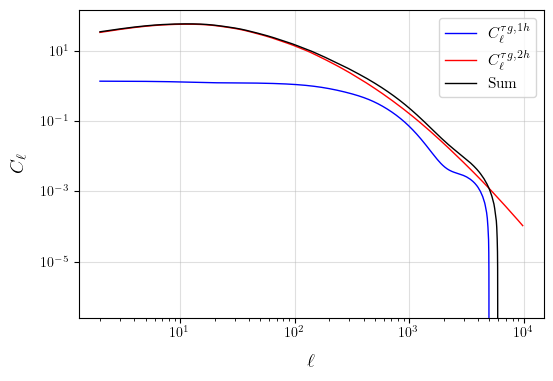

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ellr = np.arange(2, 9800)
fact = (ells * (ells+1.)/2./np.pi)[ellr]
plt.plot(ells[ellr], Cell_taug_1h[ellr], ls='-', lw=1, color='b', label=r'$C_\ell^{\tau g,1h}$')
plt.plot(ells[ellr], Cell_taug_2h[ellr], ls='-', lw=1, color='r', label=r'$C_\ell^{\tau g,2h}$')
plt.plot(ells[ellr], Cell_taug_tot[ellr], ls='-', lw=1, color='k', label=r'$\rm Sum$')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.axhline(0, color='k', linewidth=1.)
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

# Low ell for 1halo term not great but may be Limber

In [69]:
dat = np.array([ellr, Cell_taug_1h[ellr], Cell_taug_2h[ellr], Cell_taug_tot[ellr]])

In [70]:
np.save('/home/dpirvu/DarkPhoton/data_HOD_cross_tau', dat)

In [73]:
dictKey[mind]

3.2e-13

In [74]:
np.shape(dat)

(4, 9798)

In [75]:
baseline

0.0001240699661561427